In [2]:
from astropy.io import ascii
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
import numpy as np
import pandas as pd

In [3]:
# Read US student stats
t = ascii.read('students_stats_oct1723.txt')
# Read foreign student stats
t2 = ascii.read("students_foreign_stats_oct1723.txt")

In [4]:
# This one is a bit trickier because it's not really formatted, but each line 
# ends with the year of the PhD thesis, so I collect them and bin them up in a 
# histogram by year
years = []
with open("chandraphds_stats_mar1924.txt") as f:
    for line in f.readlines()[1:]:
        years.append(int(line.strip().split()[-1]))
phds = np.bincount(years)[1999:]
years = np.arange(1999, 2024)


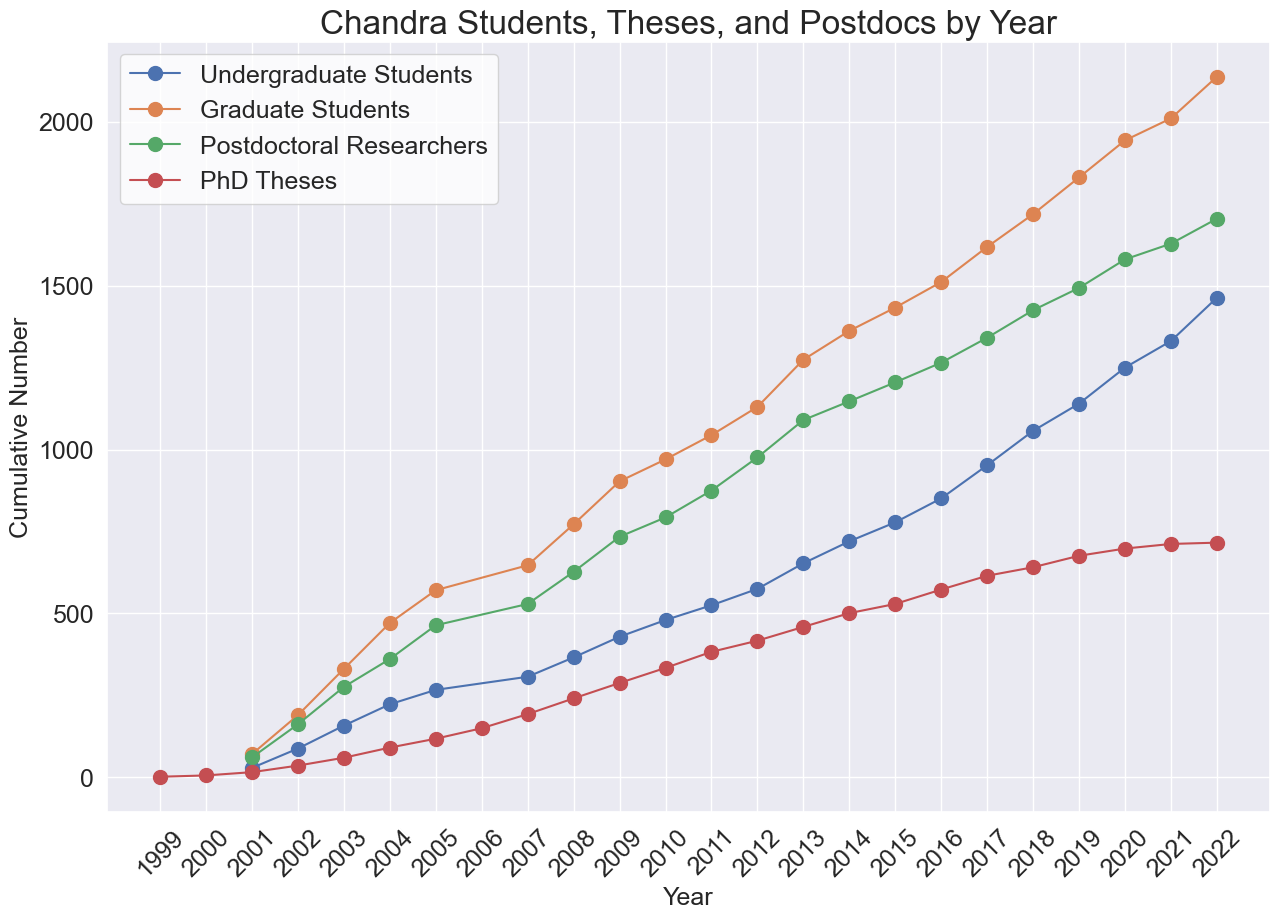

In [5]:
# This bit takes the data above per year and plots the cumulative sum
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(t["Year"], np.cumsum(t["UG"]+t2["UG"]), marker="o", markersize=10, linestyle="-", 
        color="C0", label="Undergraduate Students")
ax.plot(t["Year"], np.cumsum(t["GR"]+t2["GR"]), marker="o", markersize=10, linestyle="-", 
        color="C1", label="Graduate Students")
ax.plot(t["Year"], np.cumsum(t["PD"]+t2["PD"]), marker="o", markersize=10, linestyle="-", 
        color="C2", label="Postdoctoral Researchers")
ax.plot(years[:-1], np.cumsum(phds[:-1]), marker="o", markersize=10, linestyle="-", 
        color="C3", label="PhD Theses")
ax.set_title("Chandra Students, Theses, and Postdocs by Year", size=24)
ax.set_xticks(years[:-1])
ax.set_xticklabels(years[:-1], rotation=45, fontdict={"fontsize": 18})
ax.tick_params(axis="y", labelsize=18)
ax.set_ylabel("Cumulative Number", size=18)
ax.set_xlabel("Year", size=18)
ax.legend(fontsize=18, facecolor="white")
fig.savefig("../images/students.png", bbox_inches="tight")

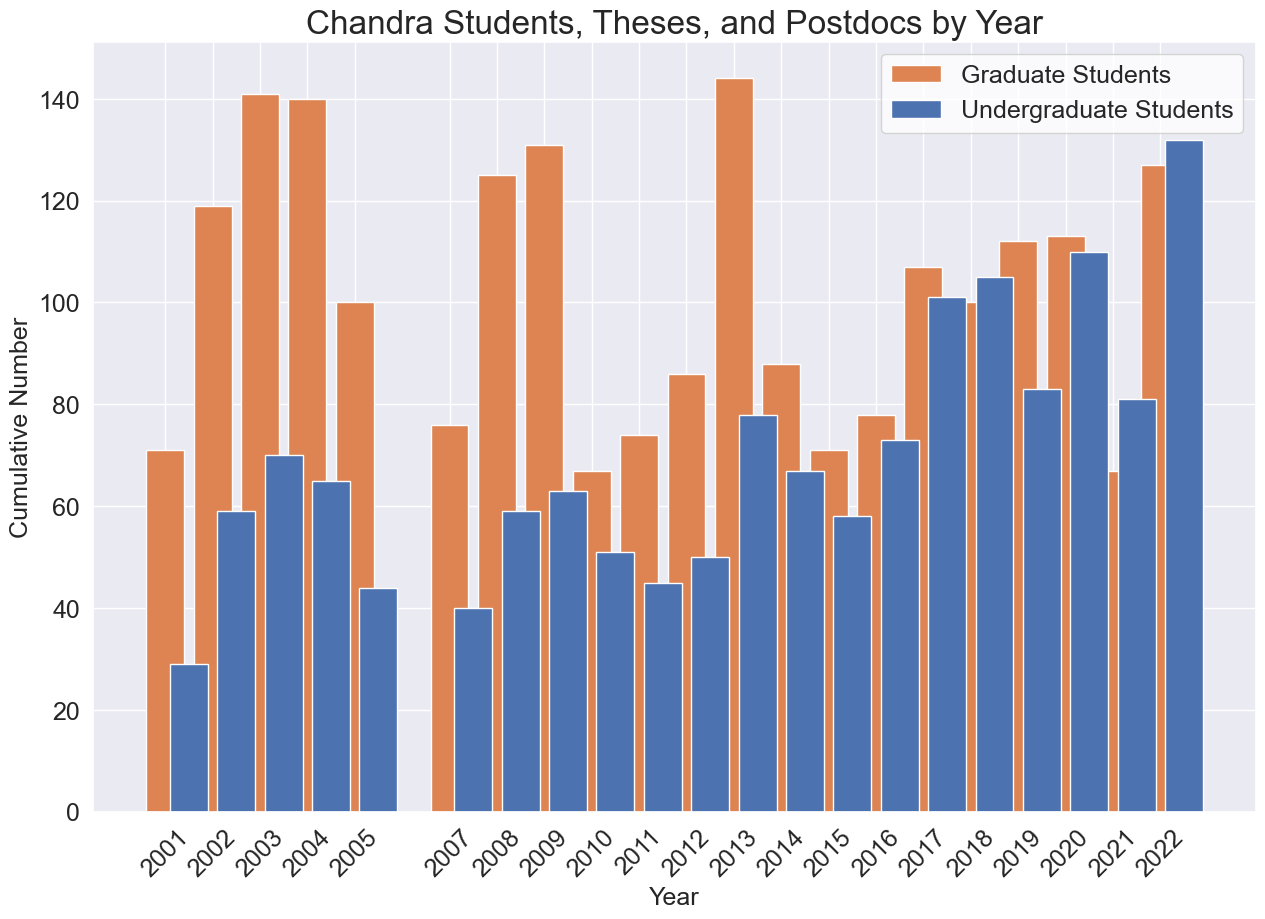

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(t["Year"], t["GR"]+t2["GR"], 
       color="C1", label="Graduate Students")
ax.bar(t["Year"]+0.5, t["UG"]+t2["UG"], 
        color="C0", label="Undergraduate Students")
#ax.plot(t["Year"], np.cumsum(t["PD"]+t2["PD"]), marker="o", markersize=10, linestyle="-", 
#        color="C2", label="Postdoctoral Researchers")
#ax.plot(years[:-1], np.cumsum(phds[:-1]), marker="o", markersize=10, linestyle="-", 
#        color="C3", label="PhD Theses")
ax.set_title("Chandra Students, Theses, and Postdocs by Year", size=24)
ax.set_xticks(t["Year"])
ax.set_xticklabels(t["Year"], rotation=45, fontdict={"fontsize": 18})
ax.tick_params(axis="y", labelsize=18)
ax.set_ylabel("Cumulative Number", size=18)
ax.set_xlabel("Year", size=18)
ax.legend(fontsize=18, facecolor="white")
fig.savefig("../images/students_bar.png", bbox_inches="tight")

In [7]:
t.columns

<TableColumns names=('Year','UG','GR','PD','Total')>

In [8]:
#tall = t.copy()
tall = {
    "Undergraduate": t["UG"],
    "Graduate": t["GR"],
    "Postdoctoral": t["PD"],
}

In [9]:
df = pd.DataFrame(tall, index=t["Year"])

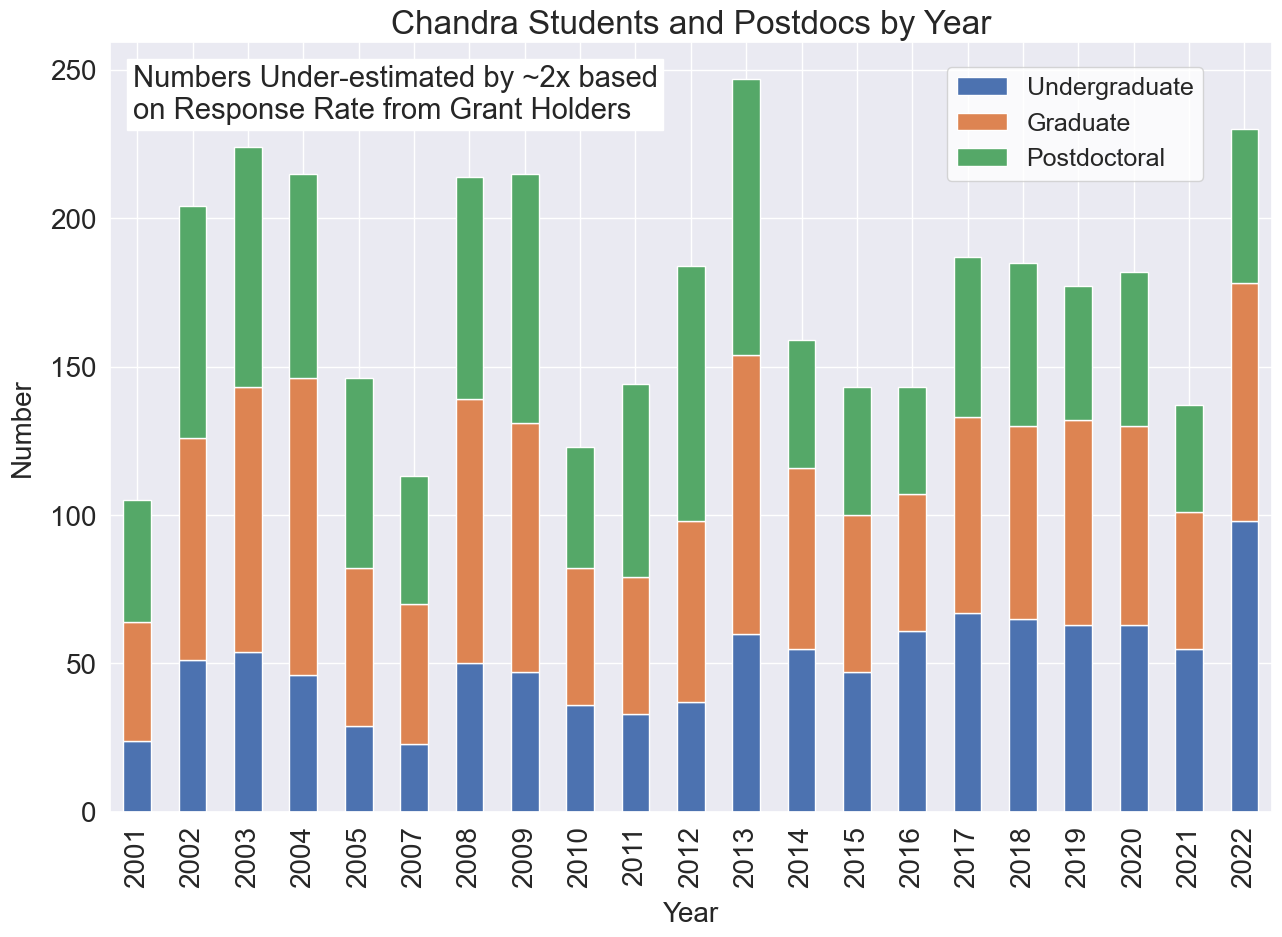

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
df.plot(kind="bar", ax=ax, stacked=True)
ax.set_title("Chandra Students and Postdocs by Year", size=24)
ax.tick_params(labelsize=20)
ax.set_ylabel("Number", size=20, labelpad=10)
ax.set_xlabel("Year", size=20, labelpad=10)
ax.legend(loc=(0.72, 0.82), fontsize=18, facecolor="white")
ax.text(0.02, 0.90, 
        "Numbers Under-estimated by ~2x based\non Response Rate from Grant Holders", 
        fontsize=21, bbox=dict(facecolor='white', alpha=1.0), transform=ax.transAxes)
fig.savefig("../images/students_bar.png", bbox_inches="tight")